In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
data=pd.read_csv('data.csv')

In [11]:
# Stracture of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [12]:
# Missing value
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
#Filling missing values
data["Cuisines"].fillna(("Others"),inplace=True)

In [14]:
#Duplicate Values check
data.duplicated().sum()


0

#Performing EDA
1. Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants


In [15]:
data.groupby("City").size().sort_values()

City
Ojo Caliente         1
Clatskanie           1
Cochrane             1
Phillip Island       1
Potrero              1
                  ... 
Ghaziabad           25
Faridabad          251
Noida             1080
Gurgaon           1118
New Delhi         5473
Length: 141, dtype: int64

#city with max restaurant has count = 5473
#city with min restaurant has count = 1

In [ ]:
 #Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence


In [19]:
CC=pd.read_excel("Country-Code.xlsx")

In [20]:
ndata=pd.merge(data,CC, on="Country Code", how="inner")


In [21]:
ndata.groupby("Country").size().sort_values()


Country
Canada               4
Qatar               20
Singapore           20
Sri Lanka           20
Indonesia           21
Phillipines         22
Australia           24
Turkey              34
New Zealand         40
Brazil              60
South Africa        60
UAE                 60
United Kingdom      80
United States      434
India             8652
dtype: int64

In [ ]:
#Find out the ratio between restaurants that allow table booking vs.those that do not allow table booking

In [22]:
ndata.groupby("Has Table booking").size()

Has Table booking
No     8393
Yes    1158
dtype: int64

In [ ]:
#Find out the percentage of restaurants providing online delivery

In [24]:
per=ndata.groupby("Has Online delivery").size()
percentage=per*100/9551
percentage

Has Online delivery
No     74.337766
Yes    25.662234
dtype: float64

In [ ]:
#Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [25]:
ndata2=ndata.loc[ndata['Has Online delivery'] == "Yes", 
'Votes'].count()
ndata3=ndata.loc[ndata['Has Online delivery'] == "No", 
'Votes'].count()


In [26]:
#Has online delivery votes count
ndata2

2451

In [27]:
#Has no online delivery votes count
ndata3


7100

In [28]:
difference=ndata3-ndata2
difference

4649

In [ ]:
#Performing EDA:2 What are the top 10 cuisines served across cities?

In [29]:
top_10=ndata.groupby(["City","Cuisines"]).size().sort_values(ascending=[False])
top_10.head(10)


City       Cuisines                      
New Delhi  North Indian                      658
           North Indian, Chinese             284
           Fast Food                         242
           Chinese                           228
           North Indian, Mughlai             207
           Cafe                              158
           Street Food                       123
           Bakery                            122
           North Indian, Mughlai, Chinese    120
           Bakery, Desserts                  117
dtype: int64

In [ ]:
#What is the maximum and minimum number of cuisines that a restaurant serves? 
#Also, which is the most served cuisine across the restaurant for eachcity?

In [31]:
cserved=ndata.groupby(["Restaurant Name","Cuisines"]).size().sort_values(ascending=[False])
cserved.head(1)


Restaurant Name  Cuisines
Cafe Coffee Day  Cafe        83
dtype: int64

In [32]:
cserved.tail(1)

Restaurant Name      Cuisines     
Ìàukura€Ùa Sofras€±  Kebab, Izgara    1
dtype: int64

In [34]:
most_cserved=ndata.groupby(["Restaurant Name","City","Cuisines"]).size().sort_values(ascending=False)


In [ ]:
#Also, which is the most served cuisine across the restaurant for eachcity?

In [ ]:
#From below result we can see that most served cuisine is cafe at cafecofee day in New Delhi city 

In [36]:
most_cserved

Restaurant Name               City        Cuisines                                
Cafe Coffee Day               New Delhi   Cafe                                        57
Domino's Pizza                New Delhi   Pizza, Fast Food                            55
Subway                        New Delhi   American, Fast Food, Salad, Healthy Food    38
Green Chick Chop              New Delhi   Raw Meats, North Indian, Fast Food          35
McDonald's                    New Delhi   Fast Food, Burger                           33
                                                                                      ..
Fuji Japanese Restaurant      New Delhi   Japanese                                     1
Fuji Bay Japanese Restaurant  Sioux City  Japanese, Sushi                              1
Fuel Diet Cafe                New Delhi   Healthy Food                                 1
Fudged                        New Delhi   Desserts, Bakery                             1
Ìàukura€Ùa Sofras€±        

In [37]:
#What is the distribution cost across the restaurants? 

dist_cost=ndata.groupby(["Restaurant Name","City","Cuisines","Average Cost for two"]).size().sort_values(ascending=False)
dist_cost


Restaurant Name      City       Cuisines                                  Average Cost for two
Cafe Coffee Day      New Delhi  Cafe                                      450                     57
Domino's Pizza       New Delhi  Pizza, Fast Food                          700                     55
Subway               New Delhi  American, Fast Food, Salad, Healthy Food  500                     38
Green Chick Chop     New Delhi  Raw Meats, North Indian, Fast Food        350                     35
McDonald's           New Delhi  Fast Food, Burger                         500                     33
                                                                                                  ..
Fuel Diet Cafe       New Delhi  Healthy Food                              350                      1
Fudged               New Delhi  Desserts, Bakery                          400                      1
Fu.D                 Gurgaon    Cafe, Fast Food                           250                    

In [38]:
#How ratings are distributed among the various factors?

Ratings=ndata.groupby(["Aggregate rating","Rating text","Rating color"]).size()
Ratings


Aggregate rating  Rating text  Rating color
0.0               Not rated    White           2148
1.8               Poor         Red                1
1.9               Poor         Red                2
2.0               Poor         Red                7
2.1               Poor         Red               15
2.2               Poor         Red               27
2.3               Poor         Red               47
2.4               Poor         Red               87
2.5               Average      Orange           110
2.6               Average      Orange           191
2.7               Average      Orange           250
2.8               Average      Orange           315
2.9               Average      Orange           381
3.0               Average      Orange           468
3.1               Average      Orange           519
3.2               Average      Orange           522
3.3               Average      Orange           483
3.4               Average      Orange           498
3.5               Go

In [ ]:
#Explain the factors in the data that may have an effect on ratings.
#For example, number of cuisines, cost, delivery option, etc.

In [41]:
Rating=ndata.groupby(["Aggregate rating","Cuisines"]).size()

C:\Users\VOZON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


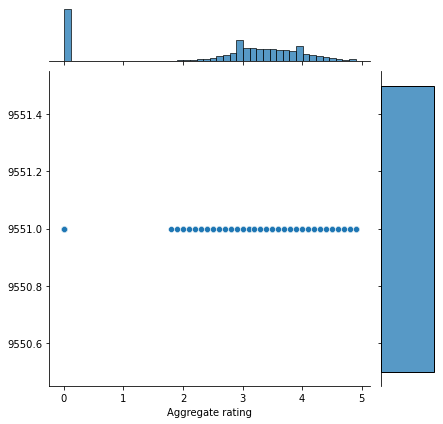

In [43]:
sns.jointplot("Aggregate rating",y=ndata.Cuisines.count(),data=ndata)

C:\Users\VOZON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Average Cost for two,Aggregate rating
Average Cost for two,1.000000,0.051792
Aggregate rating,0.051792,1.000000


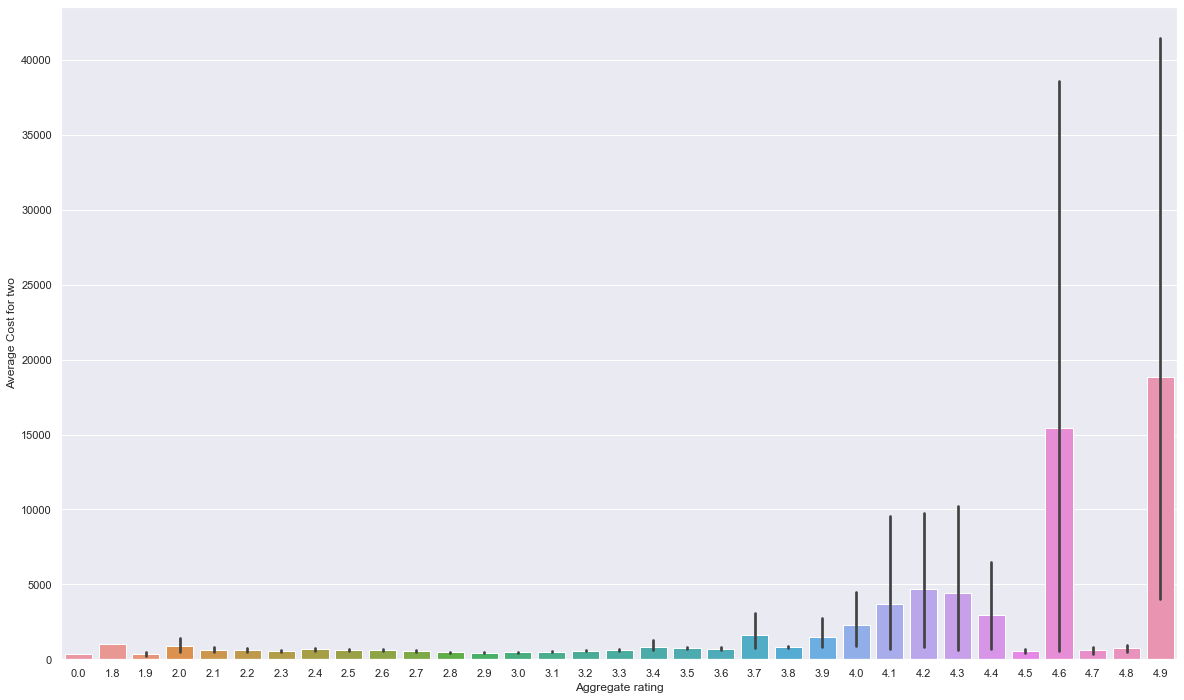

In [50]:
import matplotlib.pyplot as plt
sns.barplot("Aggregate rating","Average Cost for two",data=ndata)
sns.set(rc = {'figure.figsize':(12,12)})
ndata[["Average Cost for two", "Aggregate rating"]].corr()

In [ ]:
#From below chart we can see that there are very few restaurants for which average cost is more then 5000 
#This factor is also not good to analyse rating 

C:\Users\VOZON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Has Online delivery', ylabel='Aggregate rating'>

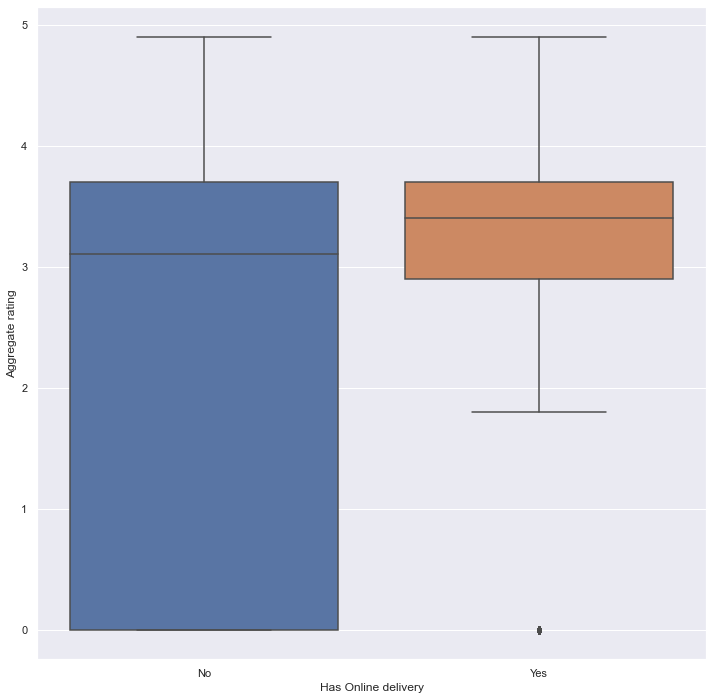

In [51]:
sns.boxplot("Has Online delivery","Aggregate rating",data=ndata)
#From below chart we can find out that restaurant which is not delivering online are mostly having rating for their restaurant
#as comparision with restaurants which are delivering online

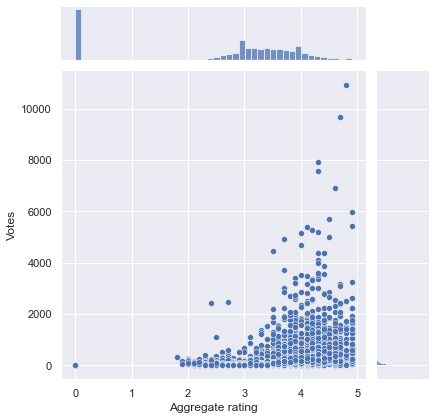

In [52]:
sns.jointplot(x="Aggregate rating",y="Votes",data=ndata)
#From below chart we can see that max restaurants are voted between 0 to 2000 & mostly ratings fall between 2.7 to 4